In [1]:
import numpy as np
from scipy import special
import netCDF4 as nc
import matplotlib.pyplot as plt
# from util import fix_bounds

In [2]:
def fix_bounds(u_string,coarse,itime,noslip=False,fix_bad_pad=False,nzbuffer=2):
    
    # leave out last point b/c it was bad padding from coarse graining
    # and ignored during training, but 
    # include sfc BC for interp, so shape stays the same    
    z_coarse = coarse.variables["z"]
    z_interp=np.zeros(z_coarse.shape)
    z_interp[1:]=z_coarse[:-1]
    
    u_coarse=np.array(np.mean(coarse.variables[u_string][:,:,:,itime],axis=(1,2)))
    u=np.zeros(u_coarse.shape[0])
    u[1:]=u_coarse[:-1]
    if not noslip:
        u[0]=3*u[1]-2*u[2] # extrap to surface, e.g. for b
    
    if fix_bad_pad:
        du=u[-nzbuffer-1]-u[-nzbuffer-2]
        for iz in range(-nzbuffer,0,1):
            u[iz]=u[-nzbuffer-1]+(nzbuffer+iz+1)*du

    return u,z_interp

In [3]:
kmax = 64
zsize = 18.074844397670482
dz = zsize / kmax
z = np.linspace(0.5*dz, zsize-0.5*dz, kmax)
# print(z)
# z_coarse=np.array(coarse_finest.variables["z"])
# #z_coarse=np.array(coarse.variables["z"])
# print(z_coarse)

zstart=0
zend=int(3*kmax/4)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): z(64), zh(65), time(11)
    variables(dimensions): float64 time(time), float64 z(z), float64 zh(zh)
    groups: default, thermo
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): z(64), zh(65), time(5)
    variables(dimensions): float64 time(time), float64 z(z), float64 zh(zh)
    groups: default, thermo
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): z(64), zh(65), time(5)
    variables(dimensions): float64 time(time), float64 z(z), float64 zh(zh)
    groups: default, thermo


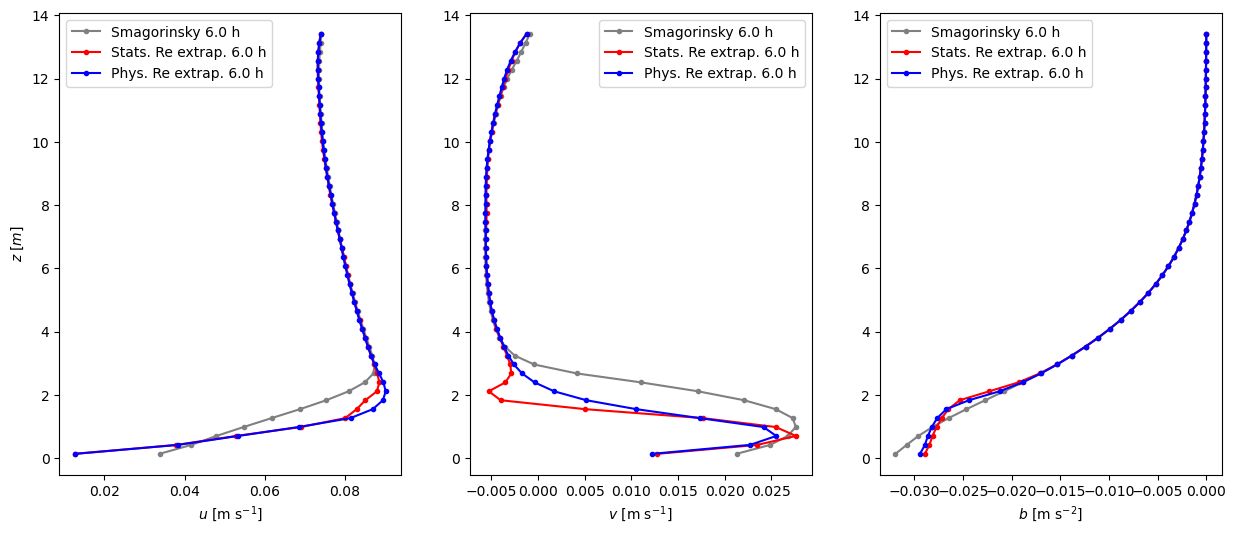

In [4]:
fig,ax = plt.subplots(1,3,figsize = (15,6))
paths=['../cases/SBL_smag_midGridReExtrap/', '../cases/SBL_stats_midGridReExtrap/', '../cases/SBL_global_midGridReExtrap/']
pathLabels=['Smagorinsky','Stats. Re extrap.','Phys. Re extrap.']
varStrings=['u','v','b']
varLabelStrings=[r'$u$ [m s$^{-1}$]',r'$v$ [m s$^{-1}$]',r'$b$ [m s$^{-2}$]']
itimes=[-1]

# colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = ['grey','r','b']
markers = ['.','.','.']
# lineStys = ['--','-']
for ifile in range(len(paths)): #tdqm notebook just draws progress bar
    marker=markers[ifile]
    color=colors[ifile]
    try:
        file=paths[ifile]+'SBL2700.default.0126000.nc'
        stats = nc.Dataset(file, 'r')
    except:
        file=paths[ifile]+'SBL2700.default.0018000.nc'
        stats = nc.Dataset(file, 'r')

    stats = nc.Dataset(file, 'r')
    print(stats)
    default = stats.groups['default']
    thermo = stats.groups['thermo']

    z = stats.variables['z'][:]
        
    for iv,varStr in enumerate(varStrings):

        for it,itime in enumerate(itimes):
            # linestyle=lineStys[it]    
            
            try: 
                var=thermo.variables[varStr][itime, :]
            except:
                var=default.variables[varStr][itime, :]
            t = stats.variables['time'][itime]
            
            ax[iv].plot(var[zstart:zend], z[zstart:zend],color=color,marker=marker,linestyle='-',label=pathLabels[ifile]+' '+str(np.round(t/60/60,decimals=1))+' h')
        ax[iv].legend()
        ax[iv].set_xlabel(varLabelStrings[iv])#r'$b [m^2 s^{-2}]$')
    
    ax[0].set_ylabel(r'$z \; [m]$')


In [6]:
plt.figure(fig)
fmt="png"
plt.savefig("Profile_longTime_ReExtrap."+fmt, format=fmt)

In [ ]:
# coarsePath= '/glade/work/adac/microHH/coarseData/'
# coarse_finest = nc.Dataset(coarsePath+'coarse4x1026_Re1800.nc', 'r')
# #coarse = nc.Dataset(coarsePath+'coarse4x2052_Re1800.nc', 'r')
# #coarse = nc.Dataset(coarsePath+'coarse4x40104_Re1800.nc', 'r')

In [ ]:
# itimeInit = 0
# u_interp,z_interp = fix_bounds('u',coarse_finest,itimeInit,noslip=True,fix_bad_pad=True)
# v_interp,_ = fix_bounds('v',coarse_finest,itimeInit,noslip=True,fix_bad_pad=False)
# b_interp,_ = fix_bounds('b',coarse_finest,itimeInit,fix_bad_pad=False)

In [ ]:
# itimeFinal = 14
# ul_interp,_ = fix_bounds('u',coarse_finest,itimeFinal,noslip=True,fix_bad_pad=True)
# vl_interp,_ = fix_bounds('v',coarse_finest,itimeFinal,noslip=True,fix_bad_pad=False)
# bl_interp,_ = fix_bounds('b',coarse_finest,itimeFinal,fix_bad_pad=False)

In [ ]:
# u = np.interp(z,z_interp,u_interp)
# v = np.interp(z,z_interp,v_interp)
# b = np.interp(z,z_interp,b_interp)
# ul = np.interp(z,z_interp,ul_interp)
# vl = np.interp(z,z_interp,vl_interp)
# bl = np.interp(z,z_interp,bl_interp)
# ug = np.zeros(kmax)
# vg = np.zeros(kmax)
# ug[:] = 0.049295030175465
# vg[:] = 0.

In [ ]:
# zstart=0
# zend=int(3*kmax/4)

# # del(fig,ax)
# fig,ax = plt.subplots(1,3,figsize = (15,6))

# ax[0].plot(ug[zstart:zend],z[zstart:zend],'--',color='grey',label=r'$u_g$')
# ax[0].plot(u[zstart:zend],z[zstart:zend],'k--',label='DNS init.')
# ax[0].plot(ul[zstart:zend],z[zstart:zend],'k.-',label='DNS final')

# ax[1].plot(vg[zstart:zend],z[zstart:zend],'--',color='grey',label=r'$v_g$')
# ax[1].plot(v[zstart:zend],z[zstart:zend],'k--',label='DNS init.')
# ax[1].plot(vl[zstart:zend],z[zstart:zend],'k.-',label='DNS final')

# ax[2].plot(b[zstart:zend],z[zstart:zend],'k--',label='DNS init.')
# ax[2].plot(bl[zstart:zend],z[zstart:zend],'k.-',label='DNS final')
